<a href="https://colab.research.google.com/github/luismiguelcasadodiaz/IBM_SkillsBuild_IA_325/blob/main/IA_325_py_cod_ex_17_s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predecir consumo energético de satélites


Una agencia espacial quiere entender mejor cómo varía el **consumo energético diario** de sus satélites dependiendo de la **duración de su misión**.

Te han pedido que analices esta relación utilizando **datos simulados**, y que desarrolles un modelo que permita:

+ Generar una muestra de satélites con características realistas.
+ Calcular una **nueva métrica**: la **eficiencia energética** del satélite.
+ Aplicar un modelo de **regresión lineal** para predecir el consumo diario a partir de la duración de la misión.
+ Visualizar los resultados para facilitar la toma de decisiones.


##  Actividades a realizar

### 1. Crear una clase Satellite

Esta clase debe representar un satélite individual con los siguientes atributos:

+ duracion_mision (en días)
+ paneles_sol (superficie total de paneles solares en m²)
+ carga_util (peso de instrumentos y sensores en kg)
+ consumo_diario (energía consumida por día en kWh)

<br>
<br>

###  2. Generar datos sintéticos con SatelliteDatasetGenerator

Esta clase debe generar N satélites simulados (por defecto 300), con los siguientes criterios:

+ duracion_mision: aleatorio entre 100 y 1000 días.
+ paneles_sol: aleatorio entre 10 y 100 m².
+ carga_util: aleatorio entre 200 y 2000 kg.
+ consumo_diario: calculado con la fórmula:
consumo_diario=5+(0.01⋅duracion_mision)+(0.002⋅carga_util)+ruido_normal
Donde ruido_normal es una perturbación aleatoria generada con np.random.normal(0, 1) para hacer los datos más realistas.


<br>
<br>

### 3. Procesar los datos con SatelliteDataProcessor

Convierte la lista de objetos Satellite en un DataFrame de pandas, y añade una columna nueva: Esta métrica mide cuánto **consume el satélite por cada metro cuadrado de panel solar**.
<br>
<br>


### 4. Aplicar regresión lineal con EnergyConsumptionRegressor

Esta clase debe aplicar el modelo de regresión lineal para predecir el consumo energético a partir de la duración de la misión. Debes:

Entrenar el modelo con duracion_mision_dias como entrada (X) y consumo_diario como salida (y).

Calcular el R² del modelo (r2_score) y mostrar los coeficientes:

y_pred=(coef⋅duracion_mision)+intercepto

<br>
<br>

### 5. Visualizar los resultados con SatellitePlotter

Muestra un gráfico con:

+ Puntos dispersos: consumo diario vs. duración de la misión.
+ Color por carga útil (usa un mapa de color viridis).
+ Línea de regresión en rojo.

<br>
<br>

### 6. Ejecutar todo con la clase SatelliteAnalysisExample

Una vez que has desarrollado las clases anteriores para generar, procesar, modelar y visualizar los datos, el último paso es integrar todo en una clase orquestadora que automatice el análisis completo.Esta clase debe encargarse de:

+ Generar los datos: usando la clase SatelliteDatasetGenerator.
+ Procesarlos: con SatelliteDataProcessor, que además de convertir la lista a DataFrame, añade la columna de eficiencia.
+ Aplicar regresión: usando EnergyConsumptionRegressor para entrenar el modelo con la duración de la misión como predictor.
+ Evaluar el modelo: imprimiendo el coeficiente de regresión, el intercepto y el R², que indica qué tan bien se ajusta el modelo a los datos.
+ Visualizar los resultados: con SatellitePlotter, mostrando una gráfica clara con los datos y la predicción lineal




## Ejemplo de uso

example = SatelliteAnalysisExample()
example.run()


Salida esperada

📈 Modelo: y = 0.0103 * x + 7.06
🔍 R² del modelo: 0.7780

## Importacion de librerias

In [433]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

1. Crear una clase Satellite

Esta clase debe representar un satélite individual con los siguientes atributos:

+ duracion_mision (en días)
+ paneles_sol (superficie total de paneles solares en m²)
+ carga_util (peso de instrumentos y sensores en kg)
+ consumo_diario (energía consumida por día en kWh)

In [434]:
class Satellite:
  def __init__(self, duracion_mision, paneles_sol, carga_util, consumo_diario):
    self.duracion_mision_dias = duracion_mision
    self.paneles_sol_m2 =paneles_sol
    self.carga_util_kg = carga_util
    self.consumo_diario_kWh = consumo_diario

  def __str__(self):
    resultado = f"Duración de la misión: {self.duracion_mision_dias} días\n"
    resultado += f"Superficie de paneles solares: {self.paneles_sol_m2} m²\n"
    resultado += f"Carga útil: {self.carga_util_kg} kg\n"
    resultado += f"Consumo diario: {self.consumo_diario_kWh} kWh\n"
    return resultado

  def get_duracion(self):
    return  self.duracion_mision_dias

  def get_paneles_sol(self):
    return self.paneles_sol_m2

  def get_carga_util(self):
    return self.carga_util_kg

  def get_consumo_diario(self):
    return self.consumo_diario_kWh

  def set_duracion(self, duracion):
    self.duracion_mision_dias = duracion

  def set_paneles_sol(self, paneles_sol):
    self.paneles_sol_m2 = paneles_sol

  def set_carga_util(self, carga_util):
    self.carga_util_kg = carga_util

  def set_consumo_diario(self, consumo_diario):
    self.consumo_diario_kWh = consumo_diario



#### tests clase Satellite

In [435]:
sat1 = Satellite(100, 50, 150, 10)
print(sat1)
print(vars(sat1).values())

Duración de la misión: 100 días
Superficie de paneles solares: 50 m²
Carga útil: 150 kg
Consumo diario: 10 kWh

dict_values([100, 50, 150, 10])


2. Generar datos sintéticos con SatelliteDatasetGenerator
Esta clase debe generar N satélites simulados (por defecto 300), con los siguientes criterios:

+ duracion_mision: aleatorio entre 100 y 1000 días.
+ paneles_sol: aleatorio entre 10 y 100 m².
+ carga_util: aleatorio entre 200 y 2000 kg.
+ consumo_diario: calculado con la fórmula: consumo_diario=5+(0.01⋅duracion_mision)+(0.002⋅carga_util)+ruido_normal Donde ruido_normal es una perturbación aleatoria generada con np.random.normal(0, 1) para hacer los datos más realistas.

In [436]:
class SatelliteDatasetGenerator:
  def __init__ (self, n = 300):
    self.rng = np.random.default_rng(42)
    self.n = n

  def _generate_satellite(self):
    dur = self.rng.integers(100, 1000)
    pan = self.rng.integers(10, 100)
    car = self.rng.integers(200, 2000)
    con = 5 + (0.01 * dur) + (0.002 * car) + self.rng.normal(0, 1)
    return Satellite(dur, pan, car, con)

  def generate(self):
    return [self._generate_satellite() for _ in range(self.n)]

#### test SatelliteDatasetGenerator

In [437]:
ds1 = SatelliteDatasetGenerator()
satelites = ds1.generate()
for satellite in satelites:
  print(satellite)

Duración de la misión: 180 días
Superficie de paneles solares: 79 m²
Carga útil: 1378 kg
Consumo diario: 10.306451195806458 kWh

Duración de la misión: 494 días
Superficie de paneles solares: 17 m²
Carga útil: 1455 kg
Consumo diario: 10.898964811346165 kWh

Duración de la misión: 573 días
Superficie de paneles solares: 97 m²
Carga útil: 1524 kg
Consumo diario: 13.461757407656417 kWh

Duración de la misión: 785 días
Superficie de paneles solares: 56 m²
Carga útil: 430 kg
Consumo diario: 12.85695607242642 kWh

Duración de la misión: 550 días
Superficie de paneles solares: 43 m²
Carga útil: 528 kg
Consumo diario: 11.622030697561216 kWh

Duración de la misión: 934 días
Superficie de paneles solares: 46 m²
Carga útil: 1680 kg
Consumo diario: 18.167509342252046 kWh

Duración de la misión: 505 días
Superficie de paneles solares: 30 m²
Carga útil: 365 kg
Consumo diario: 9.821117399171003 kWh

Duración de la misión: 599 días
Superficie de paneles solares: 87 m²
Carga útil: 1689 kg
Consumo diari

3. Procesar los datos con SatelliteDataProcessor

Convierte la lista de objetos Satellite en un DataFrame de pandas.
Añade una columna nueva para la métrica eficiencia_energia: Esta métrica mide cuánto consume el satélite por cada metro cuadrado de panel solar.

In [438]:
class SatelliteDataProcessor:
  def __init__(self, satellites):
    self.satellites = satellites
    self.df = pd.DataFrame([vars(satellite) for satellite in self.satellites])
  def calcula_eficiencia(self):
      self.df['eficiencia_energia'] = self.df['consumo_diario_kWh'] / self.df['paneles_sol_m2']
  def get_dataframe(self):
    return self.df
  def __str__(self):
    return str(self.df)


In [439]:
satelites = ds1.generate()
processor = SatelliteDataProcessor(satelites)
print(processor)
processor.calcula_eficiencia()
print(processor)
df = processor.get_dataframe()
df

     duracion_mision_dias  paneles_sol_m2  carga_util_kg  consumo_diario_kWh
0                     643              14            774           13.256144
1                     224              18            216            8.449767
2                     834              12            476           12.044731
3                     199              52            634            9.445725
4                     307              63           1437           11.043035
..                    ...             ...            ...                 ...
295                   704              73            867           14.233706
296                   666              83            864           12.101607
297                   555              54           1027           11.176864
298                   638              77            829           14.163044
299                   218              43           1328            7.575585

[300 rows x 4 columns]
     duracion_mision_dias  paneles_sol_m2  carga_uti

,duracion_mision_dias,paneles_sol_m2,carga_util_kg,consumo_diario_kWh,eficiencia_energia
0,643,14,774,13.256144,0.946867
1,224,18,216,8.449767,0.469432
2,834,12,476,12.044731,1.003728
3,199,52,634,9.445725,0.181649
4,307,63,1437,11.043035,0.175286
...,...,...,...,...,...
295,704,73,867,14.233706,0.194982
296,666,83,864,12.101607,0.145802
297,555,54,1027,11.176864,0.206979
298,638,77,829,14.163044,0.183936


4. Aplicar regresión lineal con EnergyConsumptionRegressor

Esta clase debe aplicar el modelo de regresión lineal para predecir el consumo energético a partir de la duración de la misión. Debes:

Entrenar el modelo con duracion_mision_dias como entrada (X) y consumo_diario como salida (y).

Calcular el R² del modelo (r2_score) y mostrar los coeficientes:

y_pred=(coef⋅duracion_mision)+intercepto

In [440]:
class EnergyConsumptionRegressor:
  def __init__(self, satellites):
    self.model = LinearRegression()
    self.data = satellites
    self._processor = None
    self._coeficientes = float(0)
    self._intercepto = float(0)
    self._r2 = float(0)

  def _prepara_datos(self, datos) -> tuple:
    """
    Prepara los datos de entrada para el modelo de regresión.
    """
    X = datos['duracion_mision_dias']
    Y = datos['consumo_diario_kWh']
    return X, Y

  def fit(self):
    """
    Entrena el modelo de regresión.
    """
    self._processor = SatelliteDataProcessor(self.data)
    self._processor.calcula_eficiencia()
    X, Y = self._prepara_datos(self._processor.get_dataframe())

    #print("lista->",X)
    # convertimos la lista X en un array unidimensional de aridad n (n, )
    #print("array->",np.array(X), "de dimensionalidad",np.shape(np.array(X)))
    # convertimos la lista X en un array bidimensional de n elemento en la
    # primera dimensio y 1 elemento en la segunda dimensión (n, 1)
    #print("array->",np.array(X).reshape(-1, 1), "de dimensionalidad",np.shape(np.array(X).reshape(-1, 1)))
    self.model.fit(np.array(X).reshape(-1, 1), Y)
    self.set_coeficientes(self.model.coef_[0])
    self.set_intercepto(self.model.intercept_)
    self.set_r2(r2_score(Y, self.model.predict(np.array(X).reshape(-1, 1))))

  def predict(self, horas: float) -> float:
    """
    Predice el desgaste de un vehículo.
    """
    return self.model.predict([[horas]])[0]

  def set_coeficientes(self, coeficientes):
    self._coeficientes = float(coeficientes)

  def set_intercepto(self, intercepto):
    self._intercepto = float(intercepto)

  def set_r2(self, r2):
    self._r2 = float(r2)

  def get_model(self):
    return self.model

  def get_coeficientes(self):
    return self._coeficientes

  def get_intercepto(self):
    return self._intercepto

  def get_r2(self):
    return self._r2



  def __str__(self):
    resultado = f"Modelo: y = {self._coeficientes:.4f} * x + {self._intercepto:.2f}\n"
    resultado += f"R² del modelo: {self._r2:.4f}\n"
    return resultado


#### test de la clase EnergyConsumptionRegressor

In [441]:
generator = SatelliteDatasetGenerator()
satelites = generator.generate()
ecr = EnergyConsumptionRegressor(satelites)
print(ecr)
ecr.fit()
print(ecr)

Modelo: y = 0.0000 * x + 0.00
R² del modelo: 0.0000

Modelo: y = 0.0101 * x + 7.06
R² del modelo: 0.7652



5. Visualizar los resultados con SatellitePlotter

Muestra un gráfico con:

+ Puntos dispersos: consumo diario vs. duración de la misión.
+ Color por carga útil (usa un mapa de color viridis).
+ Línea de regresión en rojo.

In [457]:
class SatellitePlotter:
  def __init__(self, satelites):
    self.satelites = satelites

  def visualizacion(self, coef, inter):
    x = [satelite.get_duracion() for satelite in self.satelites]
    y = [satelite.get_consumo_diario() for satelite in self.satelites]
    c = [satelite.get_carga_util() for satelite in self.satelites]
    r = [coef * e + inter for e in x]

    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, c=c, cmap='viridis')
    plt.plot(x, r, color='red')
    plt.AbstractContextManager
    plt.xlabel('Duración de la misión (días)')
    plt.ylabel('Consumo diario (kWh)')
    plt.colorbar(label='Carga útil (kg)')
    plt.title('Consumo diario vs. duración de la misión')
    plt.show()


## Pruebas a SatellitePlotter

In [454]:
sp=SatellitePlotter(satelites)
sp.visualizacion()

TypeError: SatellitePlotter.visualizacion() missing 2 required positional arguments: 'coef' and 'inter'

6. Ejecutar todo con la clase SatelliteAnalysisExample

Una vez que has desarrollado las clases anteriores para generar, procesar, modelar y visualizar los datos, el último paso es integrar todo en una clase orquestadora que automatice el análisis completo.Esta clase debe encargarse de:

Generar los datos: usando la clase SatelliteDatasetGenerator.
Procesarlos: con SatelliteDataProcessor, que además de convertir la lista a DataFrame, añade la columna de eficiencia.
Aplicar regresión: usando EnergyConsumptionRegressor para entrenar el modelo con la duración de la misión como predictor.
Evaluar el modelo: imprimiendo el coeficiente de regresión, el intercepto y el R², que indica qué tan bien se ajusta el modelo a los datos.
Visualizar los resultados: con SatellitePlotter, mostrando una gráfica clara con los datos y la predicción lineal

In [455]:
class SatelliteAnalysisExample:
  def __init__(self):
    self.generator = SatelliteDatasetGenerator()
    self.satelites = self.generator.generate()
    self.processor = SatelliteDataProcessor(self.satelites)
    self.processor.calcula_eficiencia()
    self.regressor = EnergyConsumptionRegressor(self.satelites)
    self.regressor.fit()
    self.plotter = SatellitePlotter(self.satelites)
  def run(self):
    print(self.regressor)
    self.plotter.visualizacion(self.regressor.get_coeficientes(), self.regressor.get_intercepto())


Modelo: y = 0.0101 * x + 7.06
R² del modelo: 0.7652



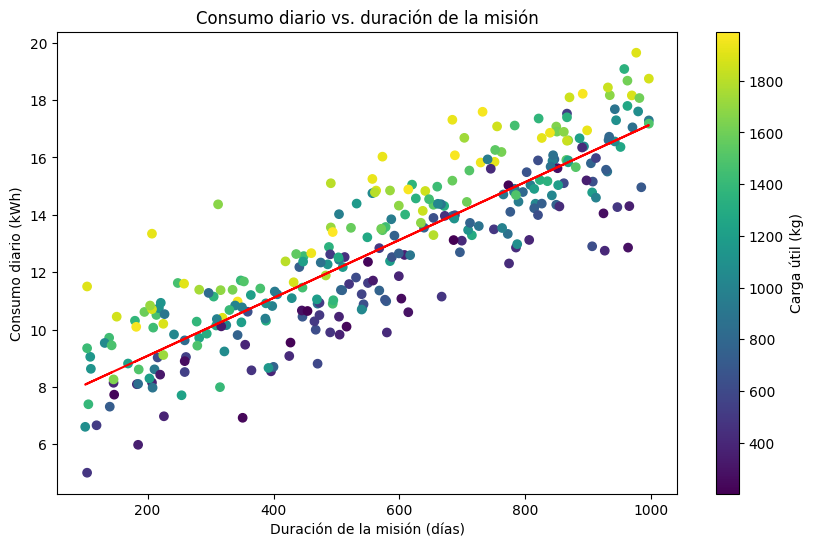

In [458]:
ejemplo = SatelliteAnalysisExample()
ejemplo.run()